In [31]:
import numpy as np
import matplotlib.pyplot as plt


csv_path = '/kaggle/input/top-250-restaurants/Top250.csv'

# Load numeric data: Sales (column 3), Units (column 5)
data = np.genfromtxt(csv_path, delimiter=',', skip_header=1, usecols=(3, 5),
                     filling_values=0, dtype=float)

# Load names and segments: Name (col 1), Segment (col 8)
names = np.genfromtxt(csv_path, delimiter=',', skip_header=1, usecols=1, dtype=str)
segments = np.genfromtxt(csv_path, delimiter=',', skip_header=1, usecols=8, dtype=str)




In [18]:
import pandas as pd
df=pd.read_csv('/kaggle/input/top-250-restaurants/Top250.csv')
df.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


In [33]:
df.shape

(250, 9)

In [29]:
# Total sales and units
total_sales = np.sum(data[:, 0])
total_units = np.sum(data[:, 1])
avg_sales = np.mean(data[:, 0])
avg_units = np.mean(data[:, 1])

print(f"Total Sales: ${total_sales:,.0f}")
print(f" Total Units: {int(total_units)}")
print(f" Average Sales: ${avg_sales:,.0f}")
print(f" Average Units: {avg_units:.2f}")

Total Sales: $253,195
 Total Units: 190685
 Average Sales: $1,013
 Average Units: 762.74


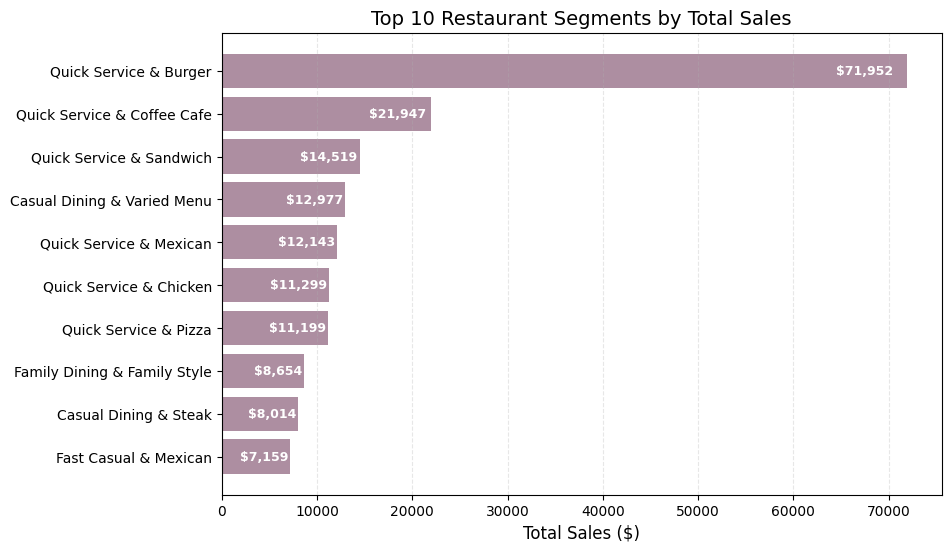

In [10]:
# Aggregate sales by segment
segment_sales = {}
for i, seg in enumerate(segments):
    seg = seg.strip('"')  # Clean quotes
    if seg not in segment_sales:
        segment_sales[seg] = data[i, 0]
    else:
        segment_sales[seg] += data[i, 0]

# Sort and take top 10
segment_sales = sorted(segment_sales.items(), key=lambda x: x[1], reverse=True)
seg_names, seg_totals = zip(*segment_sales[:10])
clean_labels = [s if len(s) <= 30 else s[:27] + '...' for s in seg_names]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(clean_labels, seg_totals, color='#AD8EA1')

for bar in bars:
    width = bar.get_width()
    plt.text(width * 0.98, bar.get_y() + bar.get_height()/2,
             f"${width:,.0f}", ha='right', va='center',
             fontsize=9, color='white', fontweight='bold')

plt.title("Top 10 Restaurant Segments by Total Sales", fontsize=14)
plt.xlabel("Total Sales ($)", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.subplots_adjust(left=0.3)
plt.show()

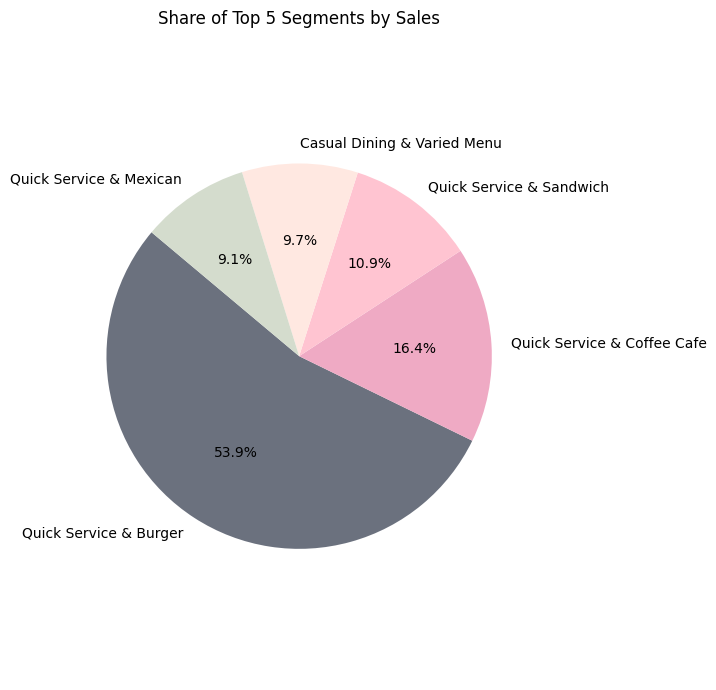

In [12]:
#share of top 5 segments
plt.figure(figsize=(7, 7))
colors = ['#6B717E','#EFAAC4','#FFC4D1','#FFE8E1','#D4DCCD']
plt.pie(seg_totals[:5], labels=seg_names[:5], autopct='%1.1f%%',
        startangle=140, colors=colors)
plt.title("Share of Top 5 Segments by Sales")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [20]:
top_10_sales = df.nlargest(10, 'Sales')
print(top_10_sales[['Restaurant', 'Sales']])


     Restaurant  Sales
0    McDonald's  40412
1     Starbucks  21380
2   Chick-fil-A  11320
3     Taco Bell  11293
4   Burger King  10204
5        Subway  10200
6       Wendy's   9762
7       Dunkin'   9228
8      Domino's   7044
9  Panera Bread   5890


In [37]:
import numpy as np


#  top 10 indices by Sales (column 0)
top_10_indices = np.argsort(data[:, 0])[-10:][::-1]  # Sort descending

#  the top 10 sales values
top_10_sales = data[top_10_indices, 0]

print("Top 10 Sales:")
print(top_10_sales)


Top 10 Sales:
[40412. 21380. 11293. 10204. 10200.  9762.  7044.  5890.  5509.  4546.]


In [35]:
restaurants = np.genfromtxt(csv_path, delimiter=',', skip_header=1, 
                            usecols=(1,), dtype=str)

# Get top 10 by sales
top_10_indices = np.argsort(data[:, 0])[-10:][::-1]

# Display results
print("Top 10 Restaurants by Sales:")
for i, idx in enumerate(top_10_indices, 1):
    print(f"{i}. {restaurants[idx]}")

Top 10 Restaurants by Sales:
1. "McDonald's"
2. "Starbucks"
3. "Taco Bell"
4. "Burger King"
5. "Subway"
6. "Wendy's"
7. "Domino's"
8. "Panera Bread"
9. "Chipotle Mexican Grill"
10. "KFC"


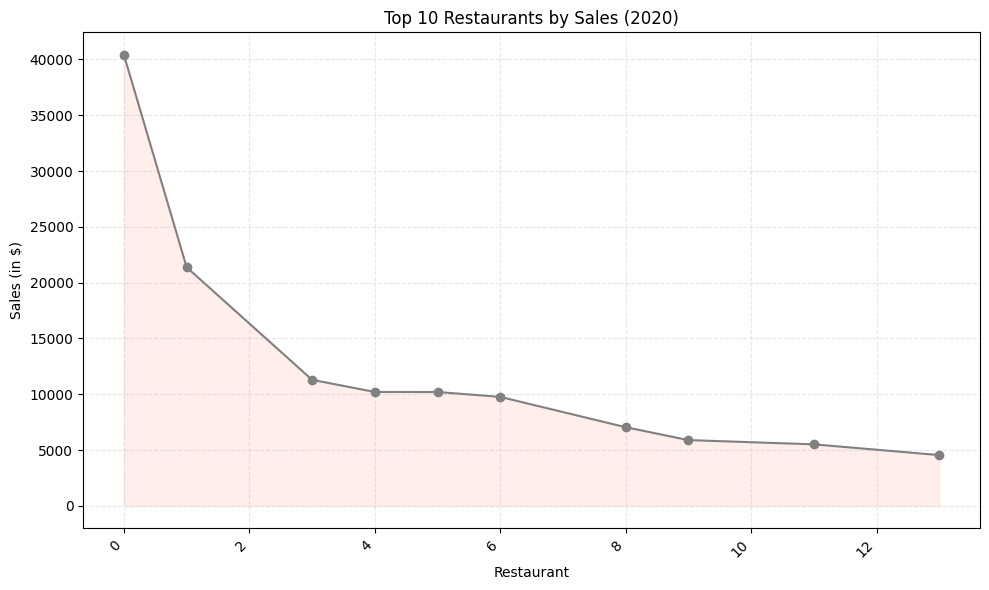

In [36]:
plt.figure(figsize=(10, 6))
plt.fill_between(top_10_indices, top_10_sales, color='#FFE8E1', alpha=0.7)
plt.plot(top_10_indices, top_10_sales, color='gray', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Restaurant")
plt.ylabel("Sales (in $)")
plt.title("Top 10 Restaurants by Sales (2020)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()